In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Pandas

In [ ]:
data = pd.read_csv('first inten project.csv')

In [ ]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [ ]:
print(data.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [ ]:
print("Shape of the data:", data.shape)

Shape of the data: (36285, 17)


In [ ]:
print("\nData types:")
print(data.dtypes)


Data types:
Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [ ]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

In [ ]:
categorical_columns = [
    'type of meal',
    'room type',
    'market segment type',
    'booking status'
]

In [ ]:
for col in categorical_columns:
    data[col] = data[col].astype('category')
    data[col + "_code"] = data[col].cat.codes

In [ ]:
categorical_columns = [
    'type of meal',
    'room type',
    'market segment type',
    'booking status'
]

for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes


In [ ]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-C,P-not-C,average price,special requests,date of reservation,booking status,type of meal_code,room type_code,market segment type_code,booking status_code
0,INN00001,1,1,2,5,0,0,0,224,3,...,0,0,88.00,0,2015-10-02,1,0,0,3,1
1,INN00002,1,0,1,3,3,0,0,5,4,...,0,0,106.68,1,2018-11-06,1,3,0,4,1
2,INN00003,2,1,1,3,0,0,0,1,4,...,0,0,50.00,0,2018-02-28,0,0,0,4,0
3,INN00004,1,0,0,2,0,0,0,211,4,...,0,0,100.00,1,2017-05-20,0,0,0,4,0
4,INN00005,1,0,1,2,3,0,0,48,4,...,0,0,77.00,0,2018-04-11,0,3,0,4,0


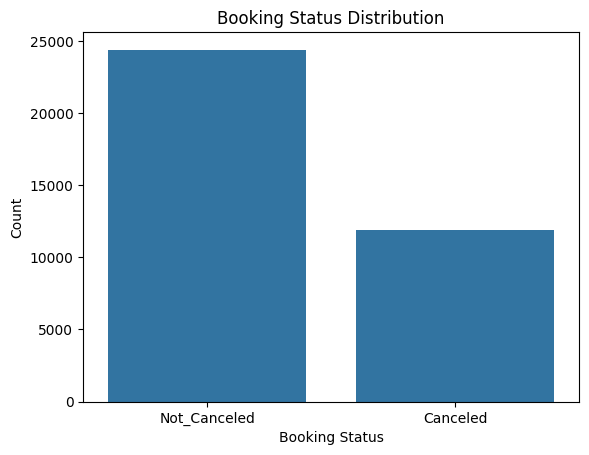

In [ ]:
sns.countplot(x='booking status', data=data)
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

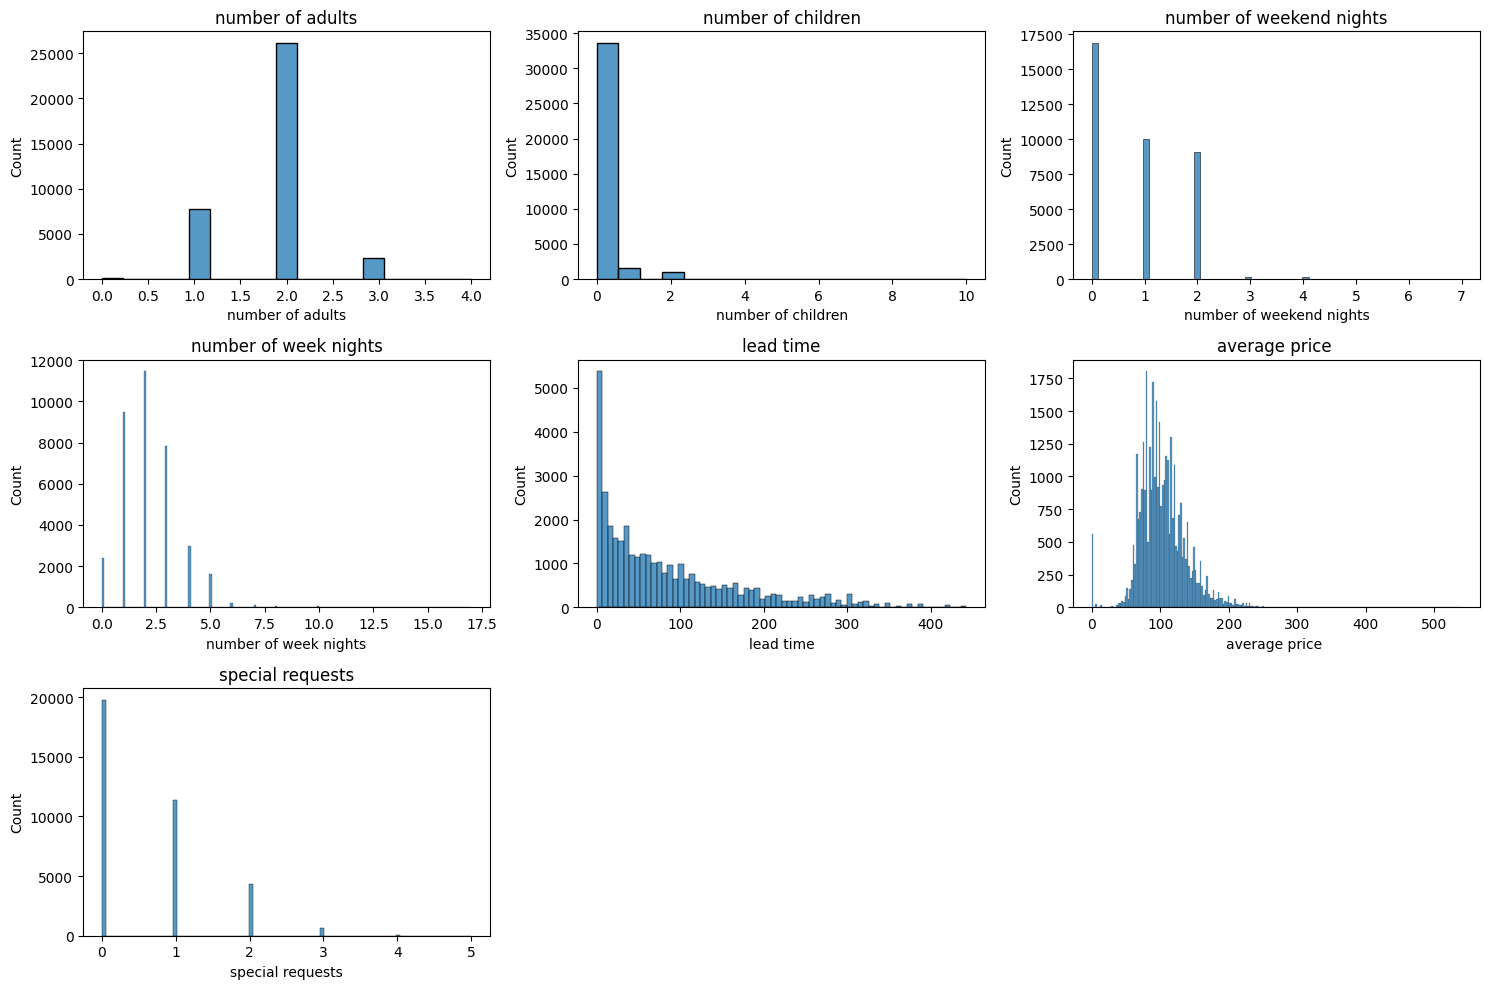

In [ ]:
num_cols = [
    'number of adults', 'number of children',
    'number of weekend nights', 'number of week nights',
    'lead time', 'average price ', 'special requests'
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=False)
    plt.title(col)
plt.tight_layout()
plt.show()


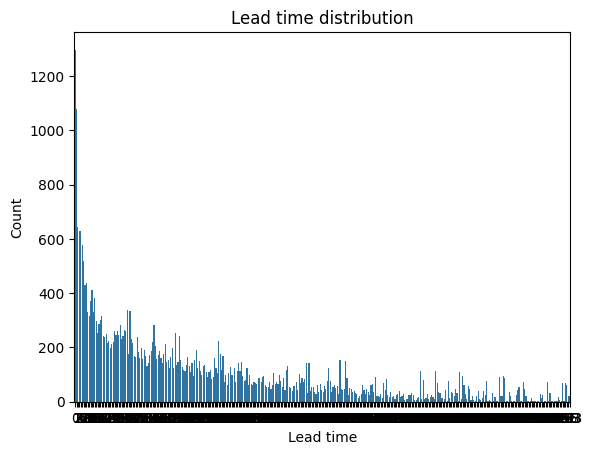

In [ ]:
sns.countplot(x='lead time', data=data)
plt.title("Lead time distribution")
plt.xlabel("Lead time")
plt.ylabel("Count")
plt.show()

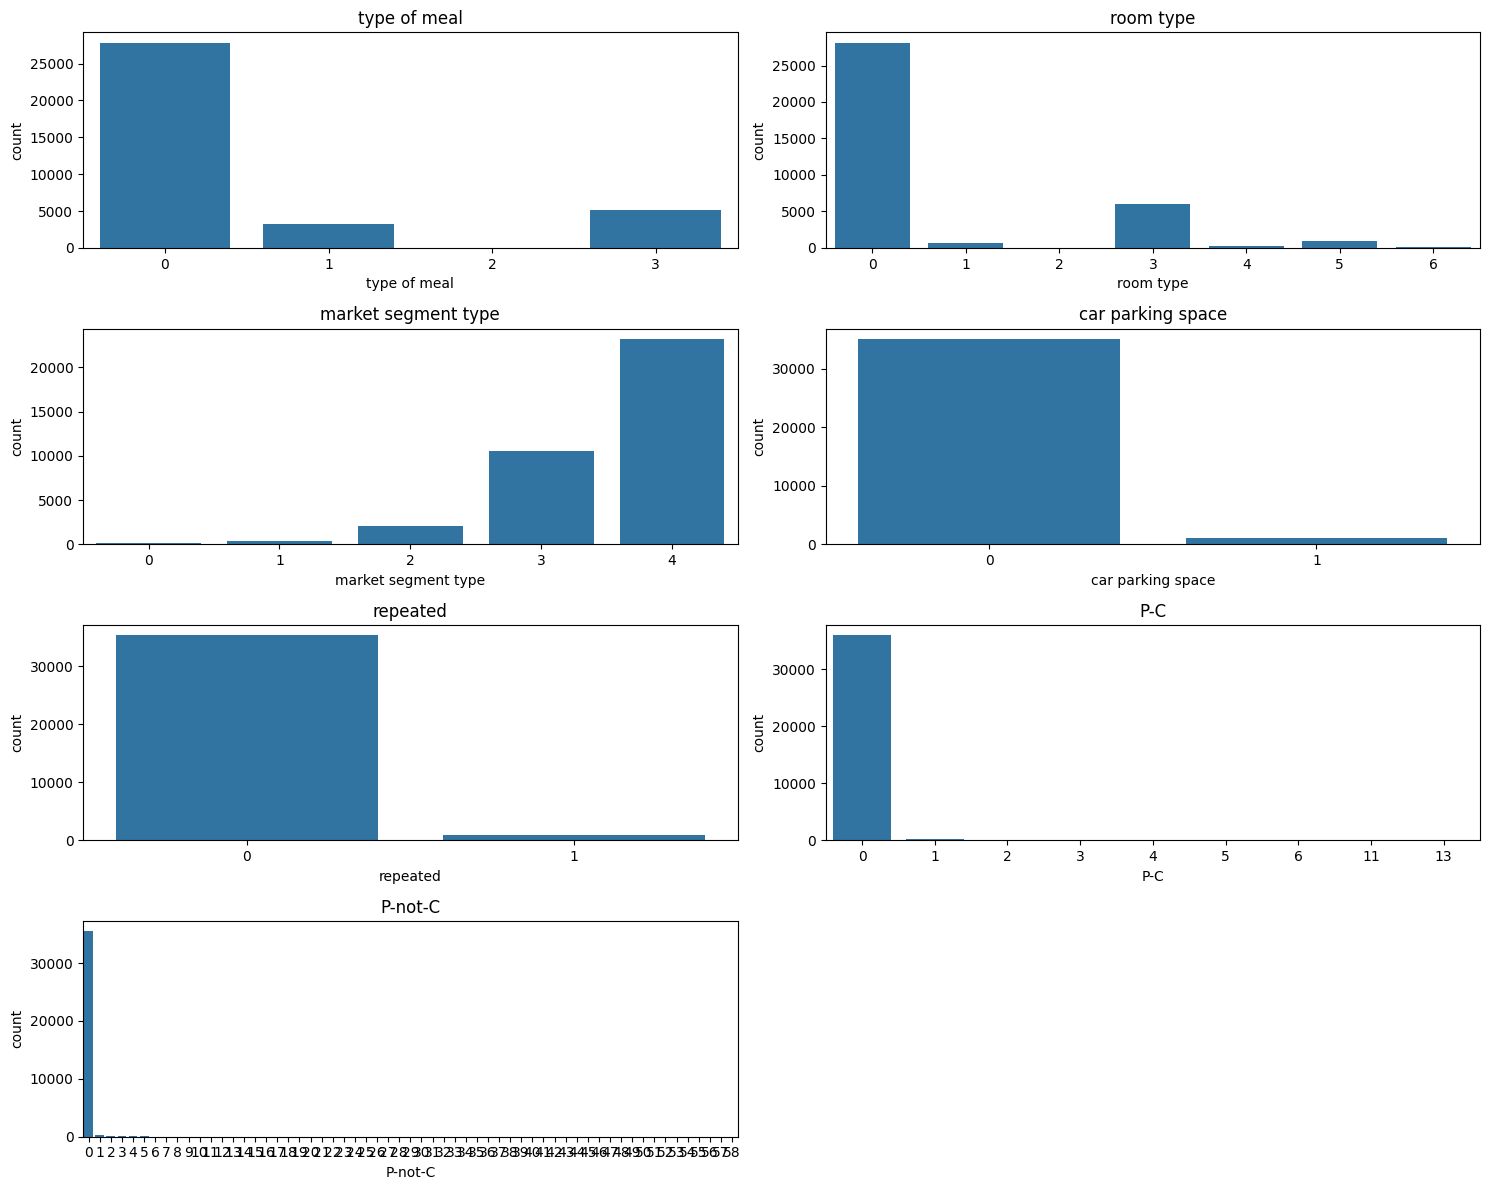

In [ ]:
cat_cols = [
    'type of meal',
    'room type',
    'market segment type',
    'car parking space',
    'repeated',
    'P-C',
    'P-not-C'
]

plt.figure(figsize=(15,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.xticks()
plt.tight_layout()
plt.show()


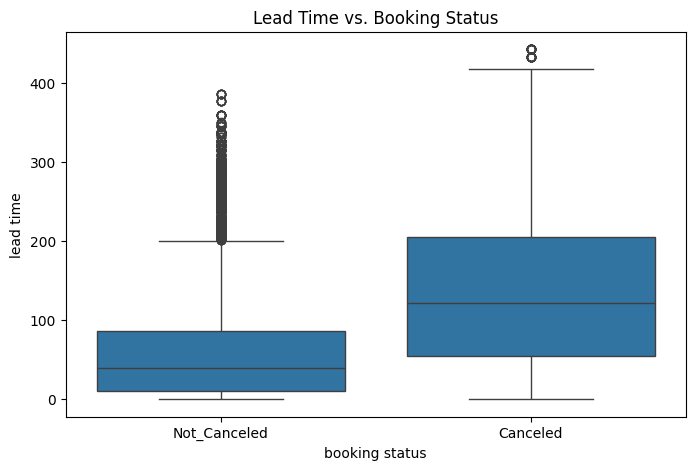

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='lead time', data=data)
plt.title('Lead Time vs. Booking Status')
plt.show()


In [ ]:
# calculate IQR
Q1 = data['lead time'].quantile(0.25)
Q3 = data['lead time'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"IQR limits for lead time: {lower_limit} to {upper_limit}")

# cap lead time
data['lead time'] = data['lead time'].clip(lower=lower_limit, upper=upper_limit)

# check results
data['lead time'].describe()


IQR limits for lead time: -146.5 to 289.5


,lead time
count,36285.000000
mean,83.767893
std,81.662186
min,0.000000
25%,17.000000
50%,57.000000
75%,126.000000
max,289.500000


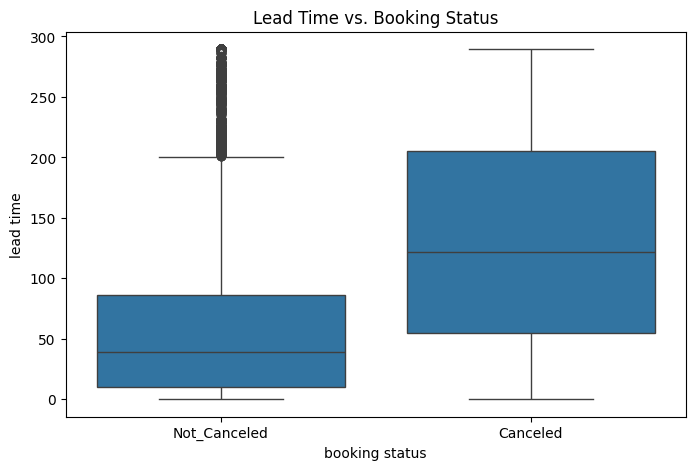

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='lead time', data=data)
plt.title('Lead Time vs. Booking Status')
plt.show()

In [ ]:
non_canceled = data[data['booking status'] == 'Not_Canceled']

Q1 = non_canceled['lead time'].quantile(0.25)
Q3 = non_canceled['lead time'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"IQR limits for non-canceled lead time: {lower_limit} to {upper_limit}")

data.loc[data['booking status'] == 'Not_Canceled', 'lead time'] = (
    non_canceled['lead time'].clip(lower=lower_limit, upper=upper_limit)
)

data['lead time'].describe()


IQR limits for non-canceled lead time: -104.0 to 200.0


,lead time
count,36285.000000
mean,82.263966
std,78.803645
min,0.000000
25%,17.000000
50%,57.000000
75%,126.000000
max,289.500000


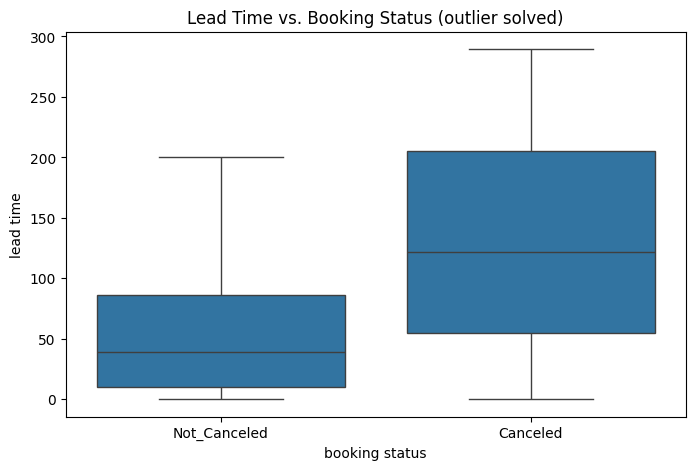

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='lead time', data=data)
plt.title('Lead Time vs. Booking Status (outlier solved)')
plt.show()

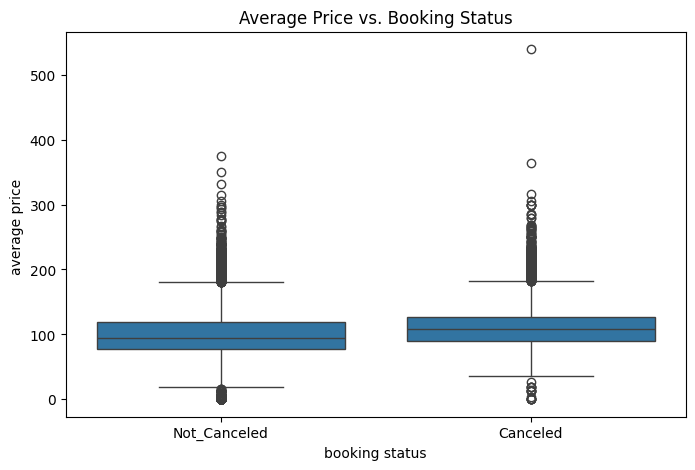

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='average price ', data=data)
plt.title('Average Price vs. Booking Status')
plt.show()


In [ ]:
non_canceled = data[data['booking status'] == 'Not_Canceled']
canceled = data[data['booking status'] == 'Canceled']

Q1_nc = non_canceled['average price '].quantile(0.25)
Q3_nc = non_canceled['average price '].quantile(0.75)
IQR_nc = Q3_nc - Q1_nc

lower_nc = Q1_nc - 1.5 * IQR_nc
upper_nc = Q3_nc + 1.5 * IQR_nc

print(f"IQR limits for non-canceled average price: {lower_nc} to {upper_nc}")

Q1_c = canceled['average price '].quantile(0.25)
Q3_c = canceled['average price '].quantile(0.75)
IQR_c = Q3_c - Q1_c

lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

print(f"IQR limits for canceled average price: {lower_c} to {upper_c}")

data.loc[data['booking status'] == 'Not_Canceled', 'average price '] = (
    non_canceled['average price '].clip(lower=lower_nc, upper=upper_nc)
)

data.loc[data['booking status'] == 'Canceled', 'average price '] = (
    canceled['average price '].clip(lower=lower_c, upper=upper_c)
)

data['average price '].describe()



IQR limits for non-canceled average price: 16.000000000000007 to 180.95999999999998
IQR limits for canceled average price: 33.585 to 182.025


,average price
count,36285.000000
mean,102.946936
std,32.003967
min,16.000000
25%,80.300000
50%,99.450000
75%,120.000000
max,182.025000


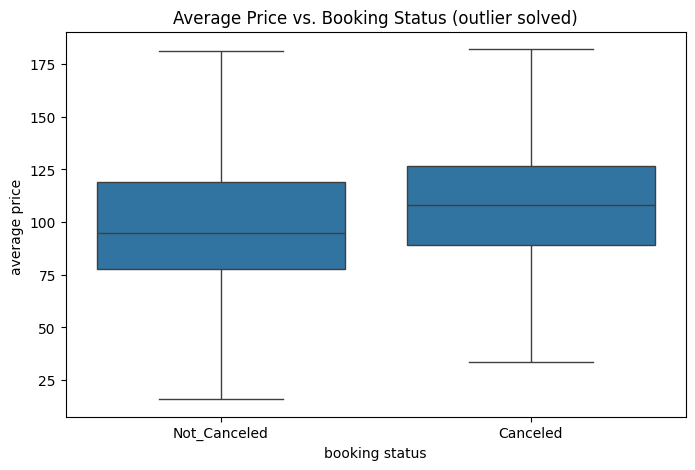

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='average price ', data=data)
plt.title('Average Price vs. Booking Status (outlier solved)')
plt.show()


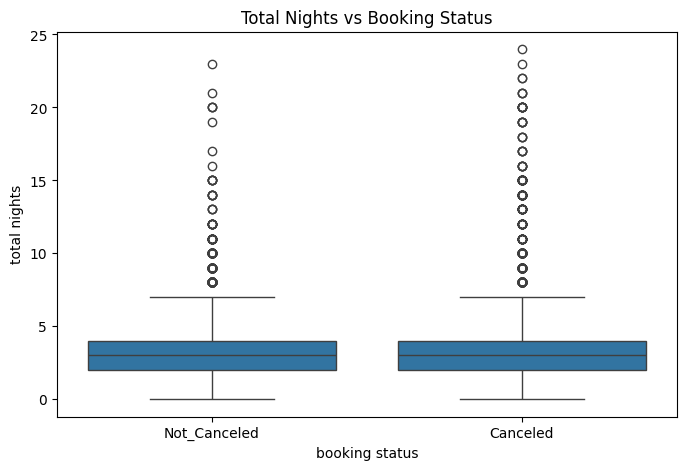

In [ ]:
data['total nights'] = data['number of weekend nights'] + data['number of week nights']
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='total nights', data=data)
plt.title('Total Nights vs Booking Status')
plt.show()

In [ ]:
non_canceled = data[data['booking status'] == 'Not_Canceled']
canceled = data[data['booking status'] == 'Canceled']

Q1_nc = non_canceled['total nights'].quantile(0.25)
Q3_nc = non_canceled['total nights'].quantile(0.75)
IQR_nc = Q3_nc - Q1_nc
lower_nc = Q1_nc - 1.5 * IQR_nc
upper_nc = Q3_nc + 1.5 * IQR_nc

print(f"IQR limits for non-canceled total nights: {lower_nc} to {upper_nc}")

Q1_c = canceled['total nights'].quantile(0.25)
Q3_c = canceled['total nights'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

print(f"IQR limits for canceled total nights: {lower_c} to {upper_c}")

data.loc[data['booking status'] == 'Not_Canceled', 'total nights'] = (
    non_canceled['total nights'].clip(lower=lower_nc, upper=upper_nc)
)

data.loc[data['booking status'] == 'Canceled', 'total nights'] = (
    canceled['total nights'].clip(lower=lower_c, upper=upper_c)
)

data['total nights'].describe()


IQR limits for non-canceled total nights: -1.0 to 7.0
IQR limits for canceled total nights: -1.0 to 7.0


,total nights
count,36285.000000
mean,2.958220
std,1.539369
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


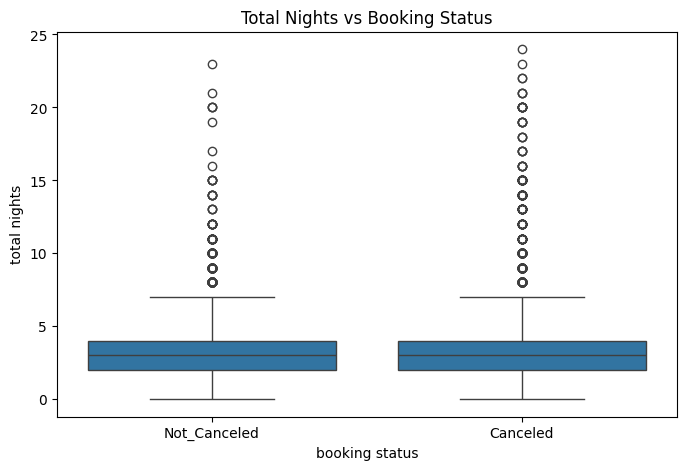

In [ ]:
data['total nights'] = data['number of weekend nights'] + data['number of week nights']
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='total nights', data=data)
plt.title('Total Nights vs Booking Status (outlier solved)')
plt.show()

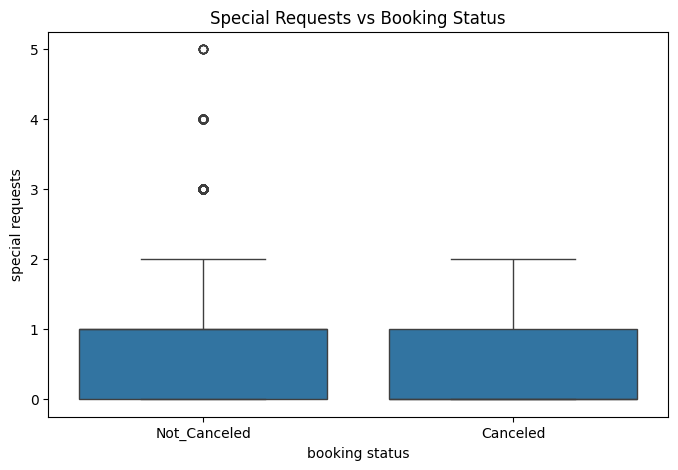

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='special requests', data=data)
plt.title('Special Requests vs Booking Status')
plt.show()

In [ ]:
non_canceled = data[data['booking status'] == 'Not_Canceled']
canceled = data[data['booking status'] == 'Canceled']

Q1_nc = non_canceled['special requests'].quantile(0.25)
Q3_nc = non_canceled['special requests'].quantile(0.75)
IQR_nc = Q3_nc - Q1_nc
lower_nc = Q1_nc - 1.5 * IQR_nc
upper_nc = Q3_nc + 1.5 * IQR_nc

print(f"IQR limits for non-canceled special requests: {lower_nc} to {upper_nc}")

Q1_c = canceled['special requests'].quantile(0.25)
Q3_c = canceled['special requests'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

print(f"IQR limits for canceled special requests: {lower_c} to {upper_c}")

data.loc[data['booking status'] == 'Not_Canceled', 'special requests'] = (
    non_canceled['special requests'].clip(lower=lower_nc, upper=upper_nc)
)

data.loc[data['booking status'] == 'Canceled', 'special requests'] = (
    canceled['special requests'].clip(lower=lower_c, upper=upper_c)
)

data['special requests'].describe()


IQR limits for non-canceled special requests: -1.5 to 2.5
IQR limits for canceled special requests: -1.5 to 2.5


/tmp/ipython-input-111-3511521998.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.  1.  1.  ... 1.  1.  2.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['booking status'] == 'Not_Canceled', 'special requests'] = (


,special requests
count,36285.000000
mean,0.606642
std,0.746950
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.500000


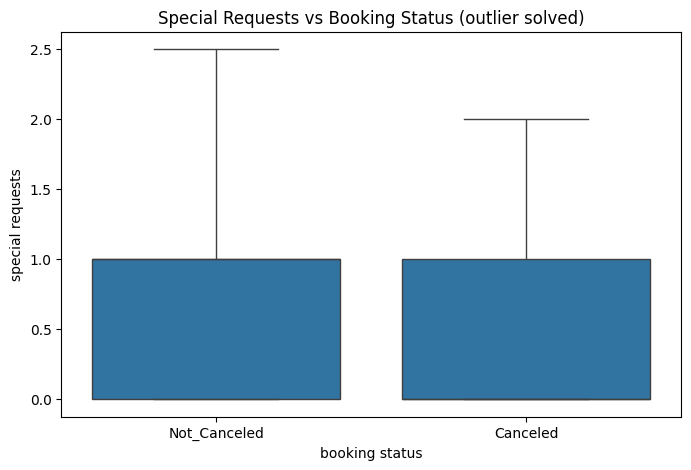

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='booking status', y='special requests', data=data)
plt.title('Special Requests vs Booking Status (outlier solved)')
plt.show()

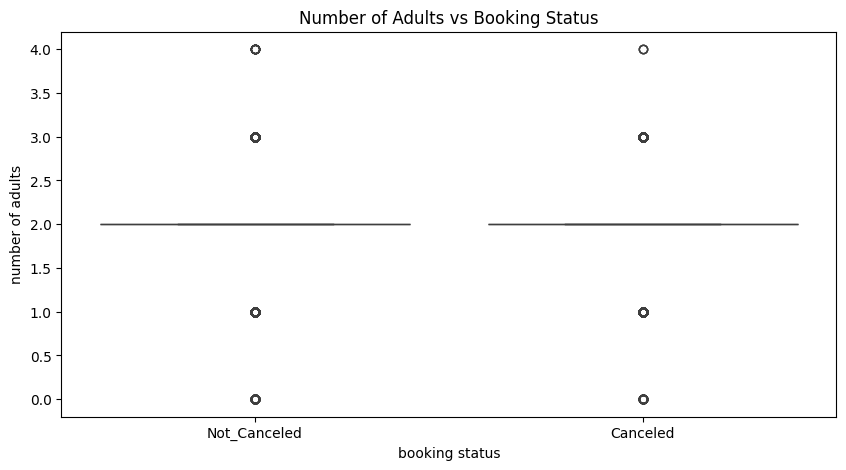

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='booking status', y='number of adults', data=data)
plt.title('Number of Adults vs Booking Status')
plt.show()


In [ ]:
non_canceled = data[data['booking status'] == 'Not_Canceled']
canceled = data[data['booking status'] == 'Canceled']

Q1_nc = non_canceled['number of adults'].quantile(0.25)
Q3_nc = non_canceled['number of adults'].quantile(0.75)
IQR_nc = Q3_nc - Q1_nc
lower_nc = Q1_nc - 1.5 * IQR_nc
upper_nc = Q3_nc + 1.5 * IQR_nc

print(f"IQR limits for non-canceled Number of Adults: {lower_nc} to {upper_nc}")

Q1_c = canceled['number of adults'].quantile(0.25)
Q3_c = canceled['number of adults'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

print(f"IQR limits for canceled Number of Adults: {lower_c} to {upper_c}")

data.loc[data['booking status'] == 'Not_Canceled', 'number of adults'] = (
    non_canceled['number of adults'].clip(lower=lower_nc, upper=upper_nc)
)

data.loc[data['booking status'] == 'Canceled', 'number of adults'] = (
    canceled['number of adults'].clip(lower=lower_c, upper=upper_c)
)

data['number of adults'].describe()

IQR limits for non-canceled Number of Adults: 2.0 to 2.0
IQR limits for canceled Number of Adults: 2.0 to 2.0


,number of adults
count,36285.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


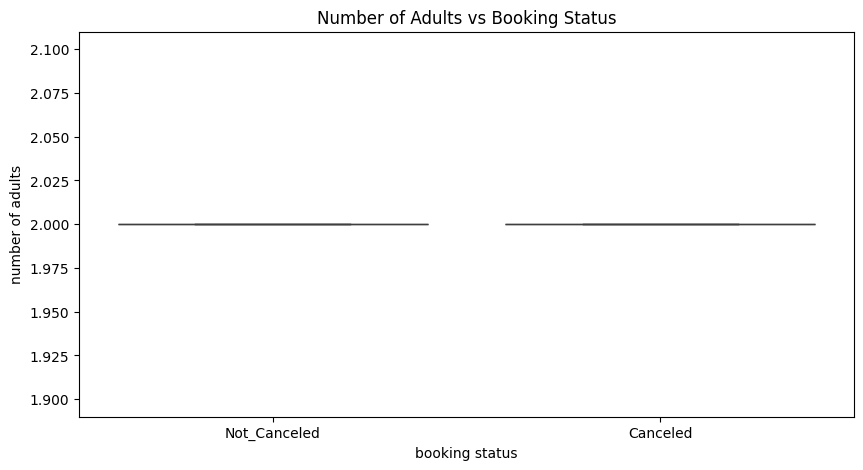

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='booking status', y='number of adults', data=data)
plt.title('Number of Adults vs Booking Status')
plt.show()


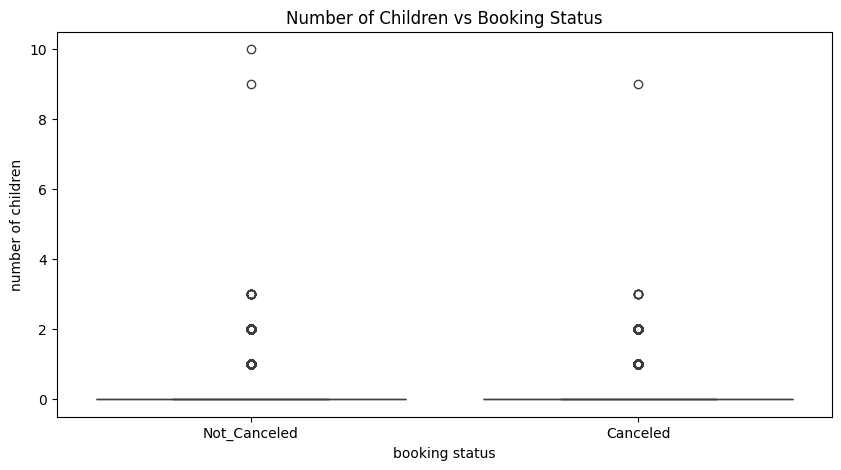

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='booking status', y='number of children', data=data)
plt.title('Number of Children vs Booking Status')
plt.show()

In [ ]:
non_canceled = data[data['booking status'] == 'Not_Canceled']
canceled = data[data['booking status'] == 'Canceled']

Q1_nc = non_canceled['number of children'].quantile(0.25)
Q3_nc = non_canceled['number of children'].quantile(0.75)
IQR_nc = Q3_nc - Q1_nc
lower_nc = Q1_nc - 1.5 * IQR_nc
upper_nc = Q3_nc + 1.5 * IQR_nc

print(f"IQR limits for non-canceled Number of Children: {lower_nc} to {upper_nc}")

Q1_c = canceled['number of children'].quantile(0.25)
Q3_c = canceled['number of children'].quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

print(f"IQR limits for canceled Number of Children: {lower_c} to {upper_c}")

data.loc[data['booking status'] == 'Not_Canceled', 'number of children'] = (
    non_canceled['number of children'].clip(lower=lower_nc, upper=upper_nc)
)

data.loc[data['booking status'] == 'Canceled', 'number of children'] = (
    canceled['number of children'].clip(lower=lower_c, upper=upper_c)
)

data['number of children'].describe()

IQR limits for non-canceled Number of Children: 0.0 to 0.0
IQR limits for canceled Number of Children: 0.0 to 0.0


,number of children
count,36285.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


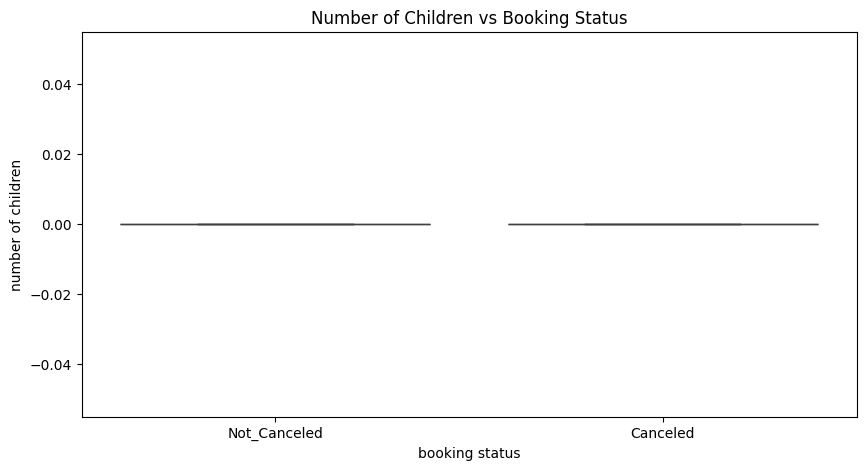

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='booking status', y='number of children', data=data)
plt.title('Number of Children vs Booking Status')
plt.show()

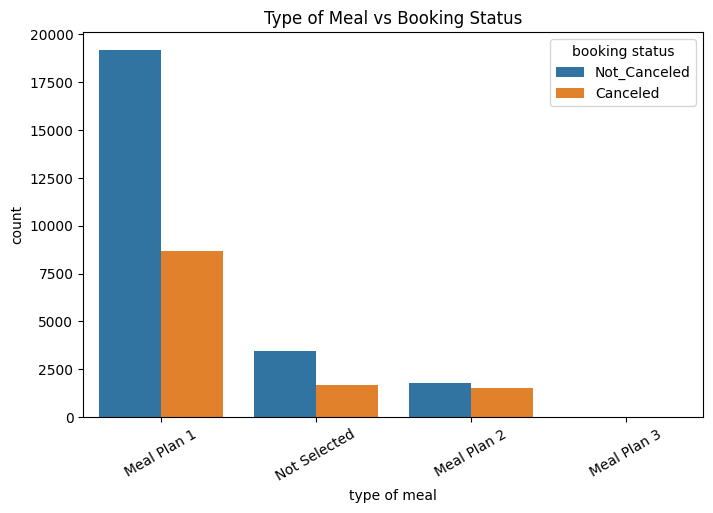

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='type of meal', hue='booking status', data=data)
plt.title('Type of Meal vs Booking Status')
plt.xticks(rotation=30)
plt.show()


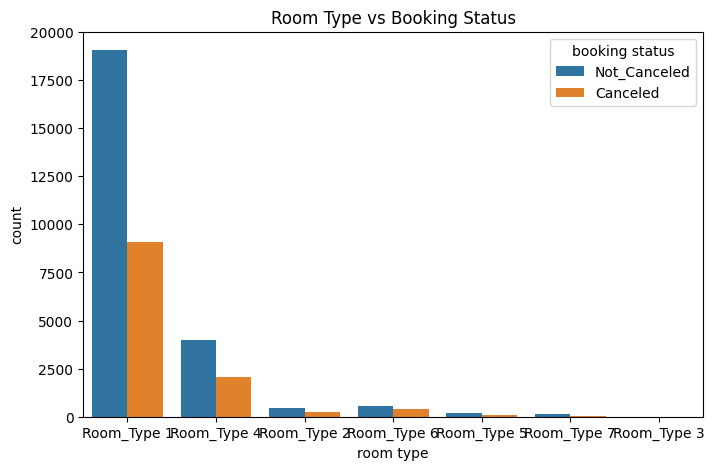

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type', hue='booking status', data=data)
plt.title('Room Type vs Booking Status')
plt.show()


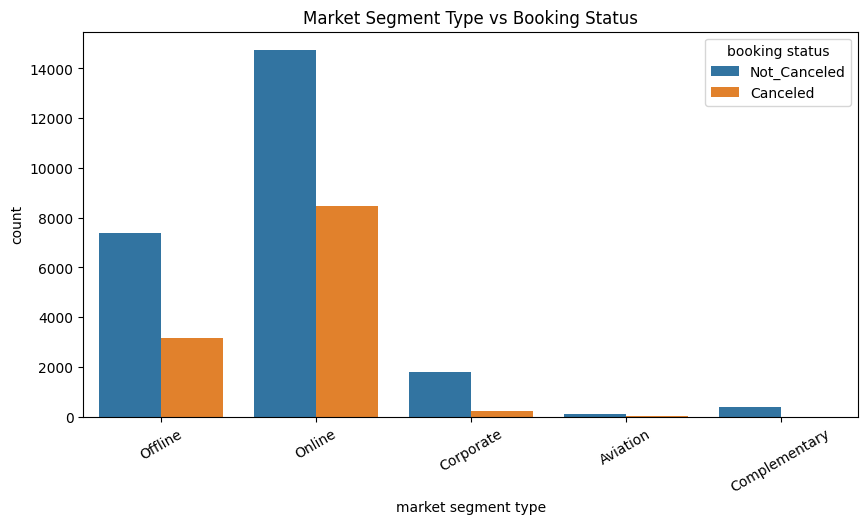

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='market segment type', hue='booking status', data=data)
plt.title('Market Segment Type vs Booking Status')
plt.xticks(rotation=30)
plt.show()


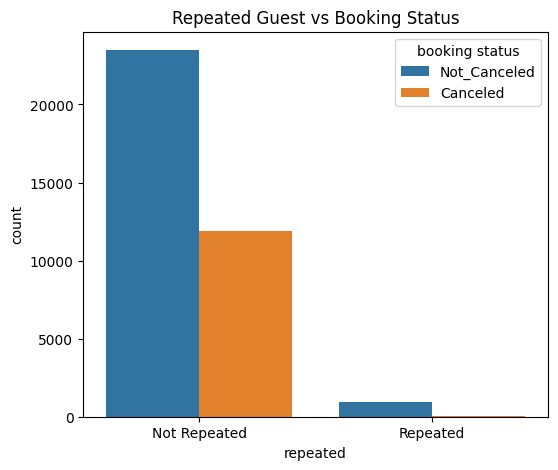

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='repeated', hue='booking status', data=data)
plt.title('Repeated Guest vs Booking Status')
plt.xticks([0,1], ['Not Repeated', 'Repeated'])
plt.show()
